# Intro to Deep Learning
My hope is that this will be a good introduction to what deep learning is, what the objective of it is, how to use it, when to use it, and many of its derivative algorithms.

## Perceptron
The basic unit of a neural network is the perceptron displayed below. It takes in a variable amount of inputs, aggregates them according to sum function (could be a linear sum or something else entirely) and then produces an output depending on the output.
![Perceptron](img191.gif)

So you have an input vector $X$, a set of weights $W$ that place a weight on each $x_i \in X$, an aggregation function $f$, and a activation function $f_i$ which determines if the perceptron will output a 1 or 0(in the binary case). 

The learning algorithm for a perceptron is rather simple and you can read a complete description [here](https://en.wikipedia.org/wiki/Perceptron#Learning_algorithm). The idea is:

1. Randomly initialize the weights.
2. For 1 training example calculate $y_i = f_i (f(X*W))$.
3. $w_inew = w_i + \alpha * t_j-y_i$ (update the weight with the difference between the target and the actual output scaled by some learning rate alpha.

## Multi-layer Perceptrons (Neural Networks)
The basic kind of neural network is the multi-layer perceptron(MLP). Simply stated it is just a network of layers of perceptrons. An example is shown below.
![Multi-layer Perceptron](MLFNwithWeights.jpg)

Now we have a matrix $Wi$ between each layer of perceptrons with $w_{ij} \in W$ being the weight between node $i$ in the pervious layer to node $j$ in the next. Each node still has an activation function but now we can have more non-linearity introduced as the output is now a non-linear combination of a non-linear combination of the inputs.

## Backpropogation
The training procedure for a multi-layey proceptron is considerably more complex. The process is called backpropogation. The procedure is explained EXCELENTLY [here](http://iamtrask.github.io/2015/07/12/basic-python-network/) and I highly reccomend going through the exercise of implementing it yourself. 

The basic idea is to perform forward propogation which is to simply run a training test case through the network and get an output. If it is incorrect then calculate the the error with respect to a particular node. This is done byu going backwards through the layers and calculating the partial derivative of the error with respect to the output of the nonlinear activation function $f_i$ of the node in consideration. This error then gets propogated to the previous layers nodes who connected to it. Below will be some example code that is in the link above but I will attempt to summarize the work quickly with a simple example.

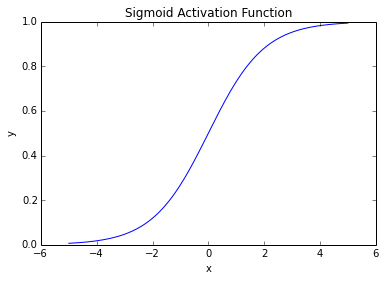

In [7]:
%matplotlib inline  
import numpy as np   #<--- a really good matrix / linear algebra library
import matplotlib    #plotting library similar to matlabs plotting
import matplotlib.pyplot as plt 

'''
This will be our activation function which is a sigmoid(plotted below). 
When doing backpropogation we will need to take the derivative of this
function so we take in a input to make it easier to do so
'''
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

x = np.linspace(-5.0,5.0,400)
y = sigmoid(x)

plt.plot(x,y)
plt.title("Sigmoid Activation Function")
plt.xlabel("x")
plt.ylabel("y")

The sigmoid activation function is the simplest type of activation function but since it's inception there have been many many more types of activation functions that include 
- Tanh
- Linear
- Step
- Rectified linear

Using a different function is not hard as long as you can provide the derivative of that function as well. Nothing complicated here.

In [8]:
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
 
# output dataset           
y = np.array([[0,0,1,1]]).T

#It's always good practice to seed your random number generator
np.random.seed(1)

## Weight Initialization
Here we are just goiing to initialize the weights of our 3 layer network randomly with mean 0. Note that this is not the only way to initialize the weights. If you know something about the data you are working with there might be a better way to initialize them. Other initialization processes also do exist but the purpose of them all is the same, set all the weights to something either completely random or closer to what they should be after convergence.

In [9]:
W0 = 2*np.random.random((3,4)) - 1
W1 = 2*np.random.random((4,1)) - 1

## Forward Propogation
This is the simple part of the training process. Take your data and run it through the network to get an output. This is as simple as multiplying matrices. Write out the matrix math and confirm that this is the case.

In [11]:
l0 = X                       #first layer is input data
l1 = sigmoid(np.dot(l0,W0))   #multiply inputs by the weights to the first layer
l2 = sigmoid(np.dot(l1,W1))   #multiply the outputs from the previous layer by the
                             #weights of the last layer

## Error Calculation
This is another step that has many solutions. We need to calculate the error we have made with the network we have. We could use l1,l2,l3, entropy, or cross-categorical entropy, or any other type of error function you can define. For simplicities sake we will stick with raw difference as our error.

In [12]:
l2_error = y - l2

## Backpropogation
Once we have the error we can start backpropogation. Thhe first step here is to take the derivative of our error with respect to the second layers weights.

In [14]:
l2_delta = l2_error*sigmoid(l2,deriv=True)

Now we propogate this error to the first layer to see how much the first layer contributed to the error.

In [16]:
l1_error = l2_delta.dot(W1.T)
l1_delta = l1_error * sigmoid(l1,deriv=True)

And finally we can update the weights in many ways as well. The way chosen here is the simplest but by far not the best way to do things.

In [17]:
W1 += l1.T.dot(l2_delta)
W0 += l0.T.dot(l1_delta)

## Put it together
We just went through 1 iteration but that is almost always not enough. We must repeat this process until a convergence criteria is met. This will minimize your error. A for loop over a lot of iterations is simple enough to do but again, better methods exist.

In [18]:
for j in xrange(60000):
    l0 = X                       #first layer is input data
    l1 = sigmoid(np.dot(l0,W0))   #multiply inputs by the weights to the first layer
    l2 = sigmoid(np.dot(l1,W1))   #multiply the outputs from the previous layer by the
                                 #weights of the last layer
    l2_error = y - l2
    
    if(j%10000) == 0:
        print "Error:" + str(np.mean(np.abs(l2_error)))
    
    l2_delta = l2_error*sigmoid(l2,deriv=True)
    
    l1_error = l2_delta.dot(W1.T)
    l1_delta = l1_error * sigmoid(l1,deriv=True)
    
    W1 += l1.T.dot(l2_delta)
    W0 += l0.T.dot(l1_delta)

Error:0.464193701547
Error:0.00500215791205
Error:0.00345431369834
Error:0.00278650792965
Error:0.00239408397566
Error:0.00212886289005
